In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\churn modeling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [5]:
x = df.iloc[:,3:-1]
y  = df.iloc[:,-1]

In [6]:
oe = OrdinalEncoder()

x.loc[:,"Geography":'Gender']= oe.fit_transform(x.loc[:,"Geography":'Gender'])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52


In [7]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2,random_state=1)

In [9]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss ='binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=250)



Epoch 1/250
250/250 [==============================] - 2s 3ms/step - loss: 0.4586 - val_loss: 0.4280
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4124 - val_loss: 0.3949
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3851 - val_loss: 0.3704
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3644 - val_loss: 0.3581
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3542 - val_loss: 0.3548
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3487 - val_loss: 0.3453
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3445 - val_loss: 0.3474
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3422 - val_loss: 0.3418
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3393 - val_loss: 0.3408
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3375 - val_lo

<AxesSubplot:>

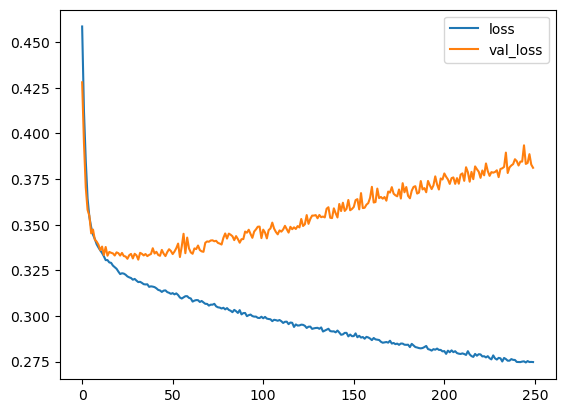

In [10]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

# Early Stopping

In [11]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=20)

In [12]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss ='binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs=250)



Epoch 1/250
250/250 [==============================] - 2s 3ms/step - loss: 0.4997 - val_loss: 0.4266
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4194 - val_loss: 0.4062
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4009 - val_loss: 0.3864
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3797 - val_loss: 0.3643
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3604 - val_loss: 0.3505
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3514 - val_loss: 0.3464
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3469 - val_loss: 0.3428
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3430 - val_loss: 0.3400
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3404 - val_loss: 0.3430
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3387 - val_lo

<AxesSubplot:>

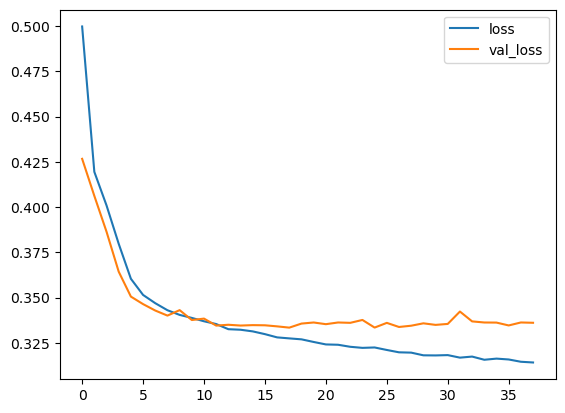

In [13]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

# Drop Out Layer

In [14]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))


ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss ='binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=250)


Epoch 1/250
250/250 [==============================] - 2s 4ms/step - loss: 0.5399 - val_loss: 0.4606
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4914 - val_loss: 0.4375
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4728 - val_loss: 0.4328
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4656 - val_loss: 0.4286
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4524 - val_loss: 0.4215
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4522 - val_loss: 0.4160
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4426 - val_loss: 0.4088
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4330 - val_loss: 0.4012
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4354 - val_loss: 0.3958
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4246 - val_lo

<AxesSubplot:>

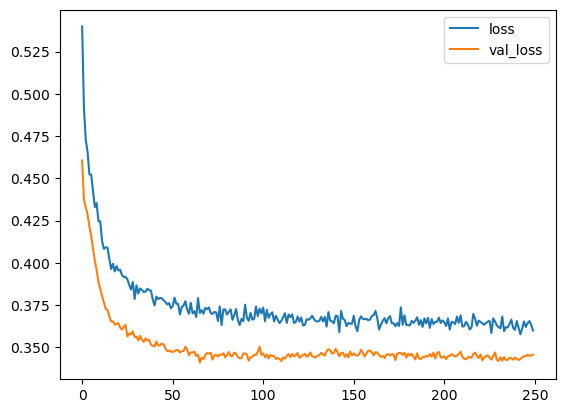

In [15]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

# Early Stopping + Drop Out Layer

In [16]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))


ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss ='binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=250)

Epoch 1/250
250/250 [==============================] - 2s 4ms/step - loss: 0.5826 - val_loss: 0.4703
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.5027 - val_loss: 0.4464
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4838 - val_loss: 0.4374
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4648 - val_loss: 0.4285
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4575 - val_loss: 0.4232
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4527 - val_loss: 0.4175
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4434 - val_loss: 0.4093
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4370 - val_loss: 0.4065
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4322 - val_loss: 0.3997
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4361 - val_lo

<AxesSubplot:>

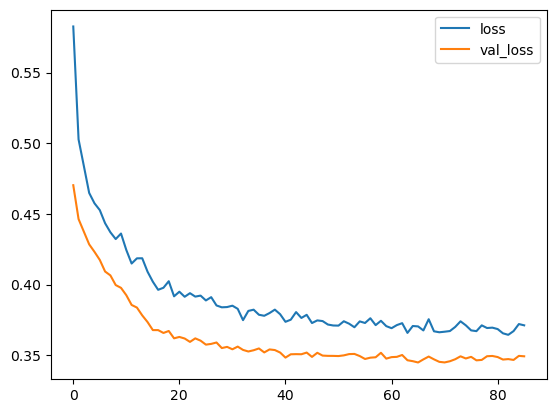

In [17]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

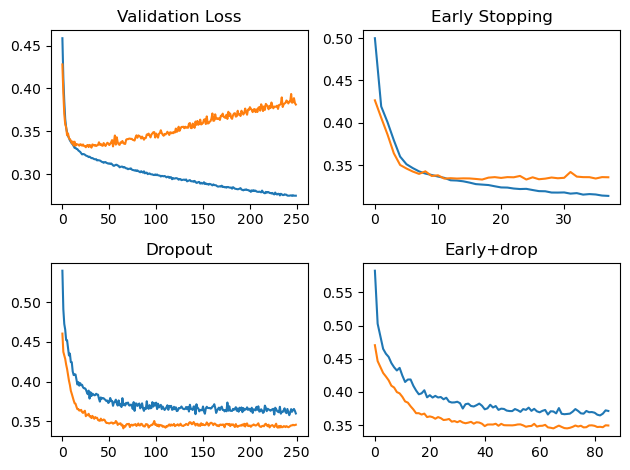

In [19]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('Dropout')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()
